<a href="https://colab.research.google.com/github/wuba2010work/CWP/blob/main/Seasonal_NPP_WaPOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install rioxarray --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00


In [13]:
import os
import glob
import datetime
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [14]:
#To upload file.
uploaded = files.upload()

Saving Amib_wub.zip to Amib_wub.zip


In [17]:
# unzip the uploaded zipfile
!unzip '/content/Amib_wub.zip' -d '/content/'

Archive:  /content/Amib_wub.zip
   creating: /content/content/output/
   creating: /content/content/output/L2-NPP-M/
  inflating: /content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-07-01.tif  
  inflating: /content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-09-01.tif  
  inflating: /content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-10-01.tif  
  inflating: /content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-06-01.tif  
  inflating: /content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-08-01.tif  
  inflating: /content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-05-01.tif  


In [18]:
# Open first raster from your unzipped files and mask out nan values
ds = rio.open_rasterio('/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-10-01.tif')
ds = ds.where(ds!=ds.attrs['_FillValue'])

In [19]:
ds

<xarray.DataArray (band: 1, y: 241, x: 162)> Size: 312kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 2kB 9.464 9.463 9.462 9.461 ... 9.232 9.231 9.23
  * x            (x) float64 1kB 40.1 40.1 40.1 40.1 ... 40.25 40.25 40.25 40.25
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:            Area
    end_date:                 2025-10-31
    long_name:                2025-10-01
    number_of_days:           31
    original_units:           N/A
    overview:                 NONE
    ...                       ...
    temporal_resolution:      Month
    units:                    gC/m²/month
    units_conversion_factor:  N/A
    _FillValue:               -9999.0
    scale_factor:             1.0
    add_offset:               0.0

In [20]:
#The values contained are stored as an array with each value representing one pixel.
ds.values


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

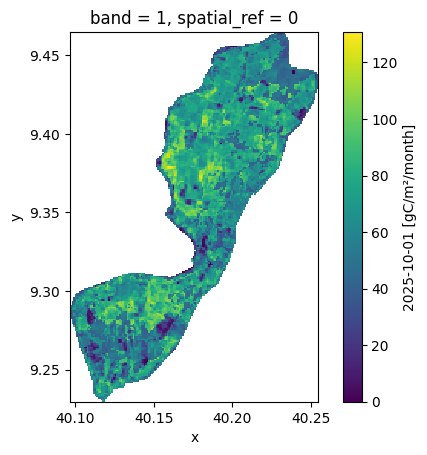

In [21]:
# We can produce a quick map of our data using the plot function
ds[0].plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [22]:
#check the min, max and mean values
print(np.nanmin(ds.values), np.nanmax(ds.values), np.nanmean(ds.values))

0.0 130.716 65.92404136563253


In [23]:
# seasonal AETI from Dekadal ETa
glob.glob('/content/content/output/L2-NPP-M/*.tif')

['/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-07-01.tif',
 '/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-09-01.tif',
 '/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-10-01.tif',
 '/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-06-01.tif',
 '/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-08-01.tif',
 '/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-05-01.tif']

In [24]:
glob.glob('/content/content/output/L2-NPP-M/*2024-05*.tif')

[]

In [27]:
# Example to get files from October 2022
glob.glob('/content/content/output/L2-NPP-M/*2025-05*.tif')

['/content/content/output/L2-NPP-M/Amibara.json_L2-NPP-M_NONE_month_2025-05-01.tif']

In [28]:
for i, fp in enumerate(glob.glob('/content/content/output/L2-NPP-M/*.tif')):
  fn = os.path.basename(fp)
  # OPEN DATA
  ds = rio.open_rasterio(fp)
  ds = ds.where(ds!=ds.attrs['_FillValue'])
  if i == 0:
    ds_sum = ds #Initialize sum if we are looking at the first raster
  else:
    ds_sum += ds #This is the python way of writing ds_sum = ds_sum + ds

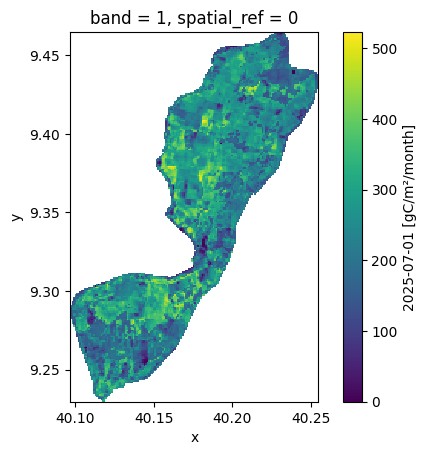

In [29]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [30]:
#Inspect Attributes to see which ones we will update
attrs = ds_sum.attrs
attrs

{'AREA_OR_POINT': 'Area',
 'end_date': '2025-07-31',
 'long_name': '2025-07-01',
 'number_of_days': 31,
 'original_units': 'N/A',
 'overview': 'NONE',
 'start_date': '2025-07-01',
 'temporal_resolution': 'Month',
 'units': 'gC/m²/month',
 'units_conversion_factor': 'N/A',
 '_FillValue': np.float64(-9999.0),
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [31]:
attrs.update({'start_date': '2025-01-01',
              'end_date': '2025-09-30',
              'units' : 'gc/m2/season'})
del attrs['number_of_days']

ds_sum.attrs  = attrs

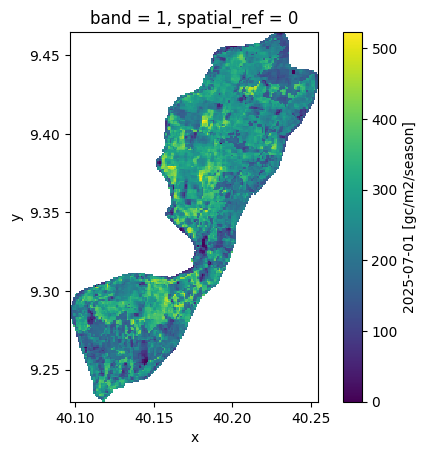

In [32]:
ds_sum.plot()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box') #this command will equally space the x and y units

In [33]:
# Save the seasonal sum to a TIFF file and download to your local drive
ds_sum.rio.to_raster("Amibara_seasonal_NPP.tif")
files.download(r'/content/Amibara_seasonal_NPP.tif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>